In [2]:
import qiskit
from qiskit import *
print(qiskit.__version__)
%matplotlib inline
from qiskit.tools.visualization import plot_histogram
from qiskit.providers.aer import QasmSimulator

0.18.2


In [3]:
# use Aer's qasm_simulator
simulator = QasmSimulator()

In [4]:
# create quantum circute acting on the q register
circuit = QuantumCircuit(2,2)

In [5]:
# add a H gate on qubit 0
circuit.h(0)

In [6]:
# add a cx (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0,1)

In [7]:
# map the quantum measurement to the classical bits
circuit.measure([0,1],[0,1])

In [9]:
# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, simulator)

In [10]:
# execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1024)

In [12]:
# grad results from the job
result = job.result()

In [14]:
# return counts
counts = result.get_counts(compiled_circuit)
print('total count for 00 and 11 are: ',counts)

total count for 00 and 11 are:  {'00': 502, '11': 522}


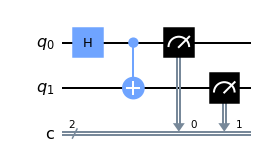

In [15]:
# draw circuit
circuit.draw(output='mpl')

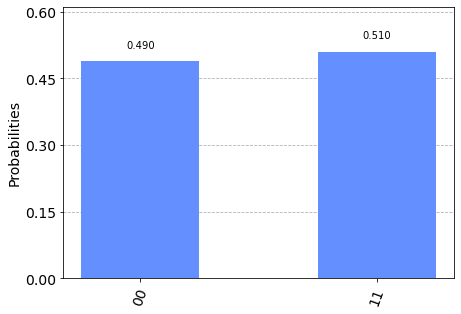

In [16]:
# plot histogram
plot_histogram(counts)

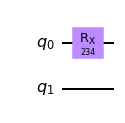

In [22]:
from qiskit.circuit import QuantumCircuit, Parameter
from qiskit.providers.aer import AerSimulator

backend = AerSimulator()
circuit = QuantumCircuit(2)
theta = Parameter('theta')
circuit.rx(234, 0)
circuit.draw(output='mpl')

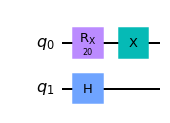

In [34]:
backend = AerSimulator()
circuit = QuantumCircuit(2)
# theta = Parameter('theta')
circuit.rx(20, 0)
circuit.x(0)
circuit.h(1)
result = execute(circuit, backend=backend, shots=1024).result()
# counts=result.get_counts()
# print(counts)
circuit.draw(output='mpl')